<h1>
<center>
Assignment 5: PCA, Naive Bayes, Clustering, and Deep Learning
</center>
</h1>
<center>
CS 4262/5262 - Foundations of Machine Learning<br>
Vanderbilt University, Spring 2023<br>
Due: Check Brightspace
</center>
<hr>
<br>This assignment will focus on: (1) PCA, (2) Clustering, and (3) deep learning. In addition to programming tasks, there are short-answer questions throughout the notebook. 

Contact: Quan Liu quan.liu@vanderbilt.edu for any clarifying questions.


### Please enter your name:  Mary Stirling Brown




--- 
## Part 1: Eigencats


In this part, you will be working with a dataset of cat images. You will apply principal component analysis (PCA) to decompose the data into "eigencats", and use the eigencat basis to form low-dimensional approximations of the original data.

- Load the cat dataset from the file "cats.csv" (should be included in the git repo; here is the original source: https://github.com/bioramble/pca). This dataset consists of a 4096 x 80 matrix of "pre-flattened" 64 x 64 images of cats (i.e., each of eighty 64 x 64 image has been flattened into a vector of length 4096).
- A function for loading the dataset has been provided below, so you just need to call it.


In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
# code for loading dataset into matrix
# returns a matrix where each of the 80 rows represents a cat image 
# and the 4096 columns represent features (pixels) of the images
def load_cat_file(file_path):
    cat_matrix = np.zeros((80,4096))
    with open(file_path) as f:
        cat_reader = csv.reader(f, delimiter=',')
        for i, line in enumerate(cat_reader):
            pixels = [int(p) for p in line]
            cat_matrix[:,i] = pixels
    return cat_matrix
            
cat_matrix = load_cat_file('cats.csv')

- The next block of code provides a function for visualizing a single cat image, given a flattened image as input.
   


In [3]:
# function for visualizing a cat image
def vis_cat_image(cat_vec, title, axis=None):
    plt.title(title)
    cat_img = np.reshape(cat_vec, (64,64)).T 
    if axis is None:
        plt.imshow(cat_img, interpolation='nearest')
        plt.show()
    else: 
        axis.imshow(cat_img, interpolation='nearest')

 * To familiarize yourself with the data, use the function above to display a single cat image of your choosing.
   

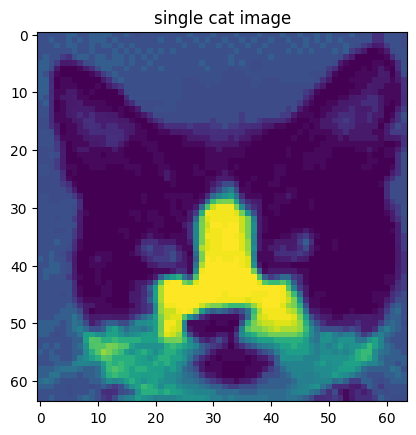

In [4]:
vis_cat_image(cat_matrix[0], "single cat image")

* Next, display the average over all 80 cat images:

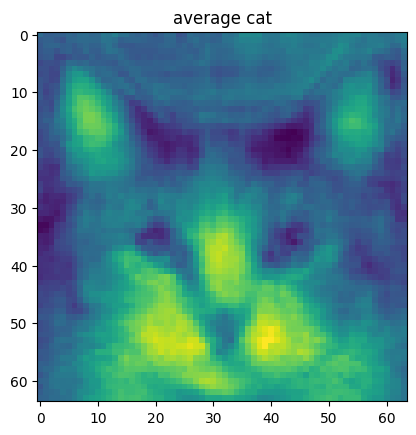

In [5]:
average_cat = np.mean(cat_matrix, axis=0)
vis_cat_image(average_cat, "average cat")

You will next perform PCA on the cat dataset to extract a set of "eigencats".
- Recall that it is important to perform feature scaling prior to PCA. First, please mean-center and standardize over features in the cat dataset.
- Next, calculate the eigenvectors and eigenvalues of the covariance matrix. **Do not use PCA from scikit-learn**, but you can use numpy functions. Please be sure to read and understand the documentation of those functions. 
- Display (as images) the top 16 "eigencats" (i.e., the 16 eigenvectors corresponding to the largest 16 eigenvalues). You can use the function `vis_cat_image` above. Place a title on each image that indicates which of the eigencats is displayed, where 'eigencat 1' corresponds to the largest eigenvalue and 'eigencat 16' corresponds to the 16th-largest eigenvalue.
- Display a plot of the eigenvalues, ordered from largest to smallest. Include a title and label the axes.

In [6]:
# Normalizing the data to mean = 0 and variance = 1
def normalization(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    return X

cat_matrix = normalization(cat_matrix)

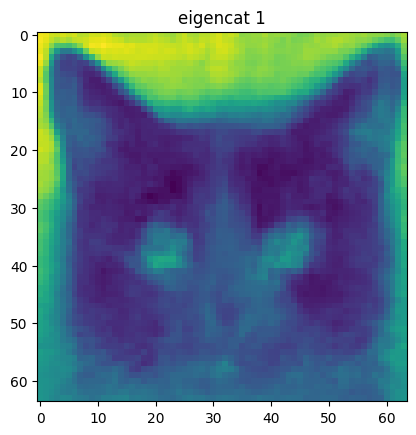

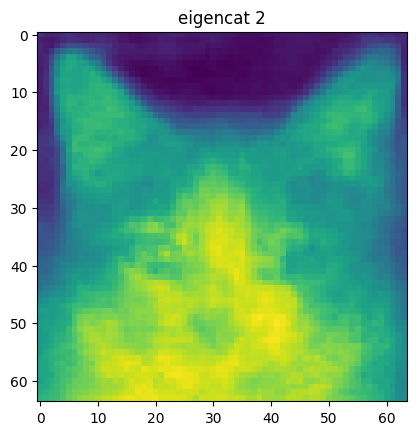

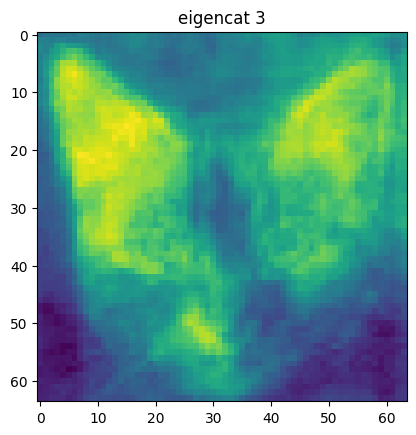

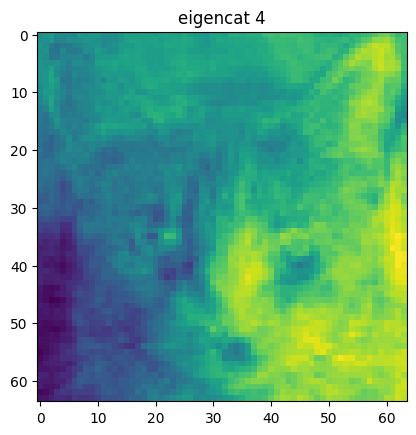

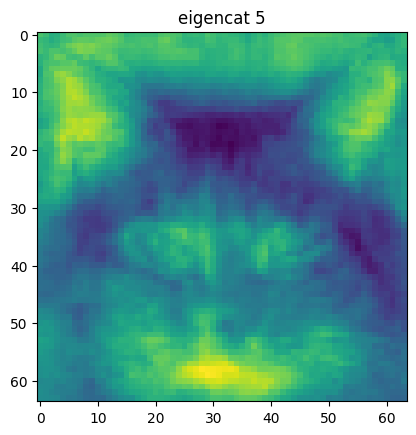

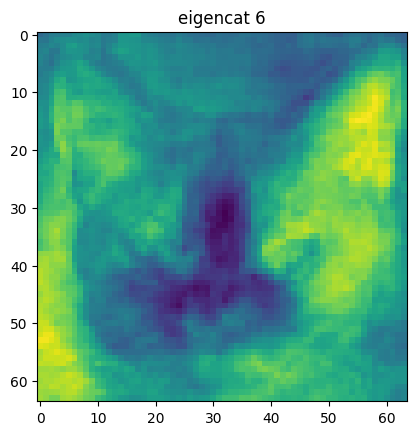

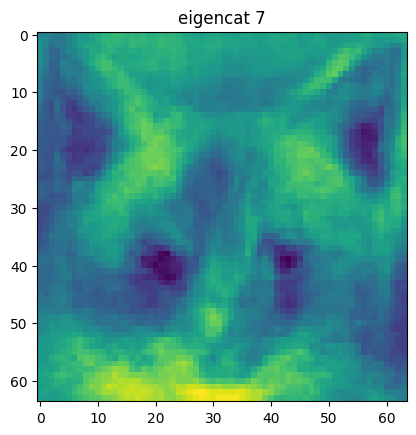

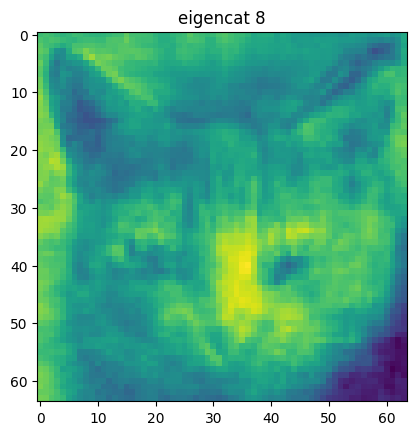

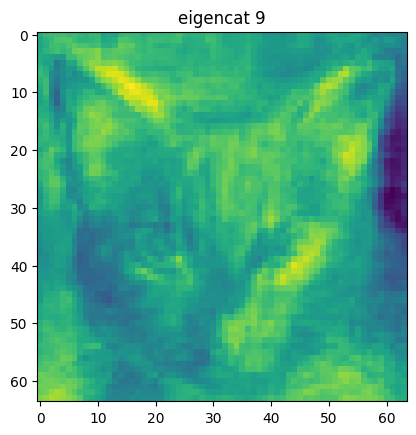

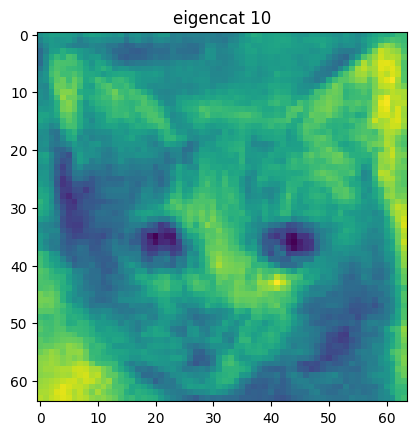

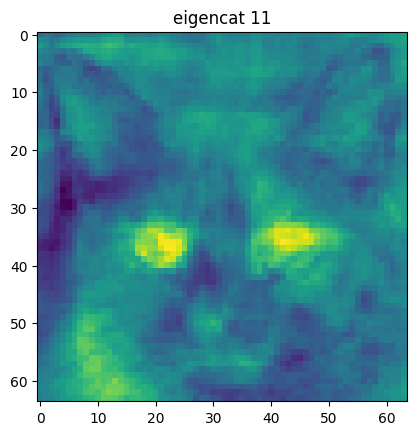

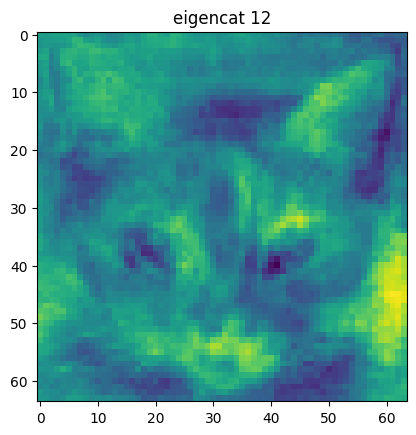

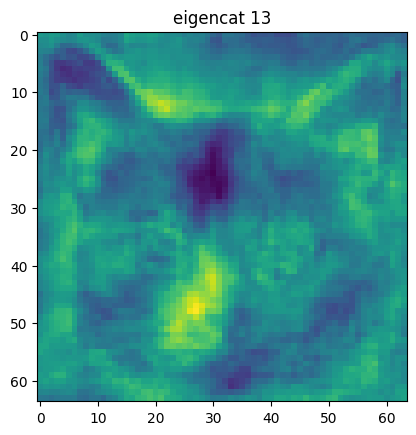

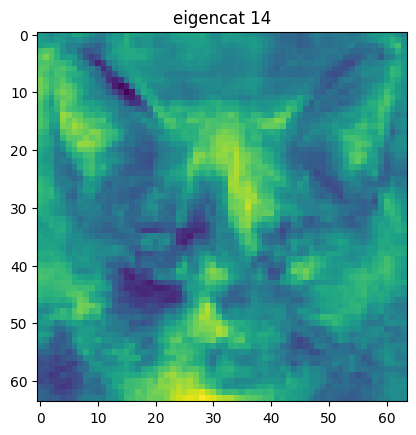

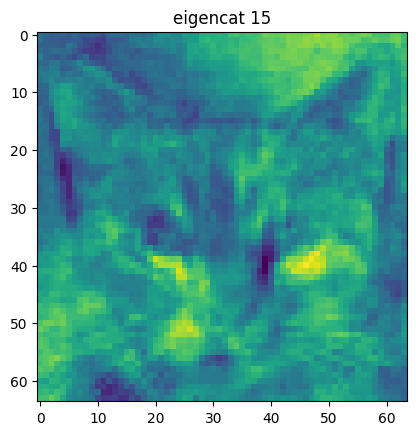

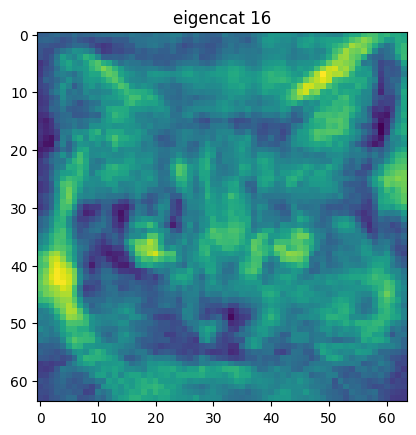

In [7]:
# covariance matrix of cat_matrix 4096 x 4096
cov = np.cov(cat_matrix.T)

# get eigenvalues and eigenvectors with only the real parts
eigenvalues, eigenvectors = np.linalg.eig(cov)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

# sort eigenvectors and eigenvectors
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# top 16 eigenvectors and eigenvalues
top_eigenvectors = eigenvectors[:, :16]
top_eigenvalues = eigenvalues[:16]


for i in range(16):
    title = "eigencat " + str(i + 1)
    vis_cat_image(top_eigenvectors[:, i], title)

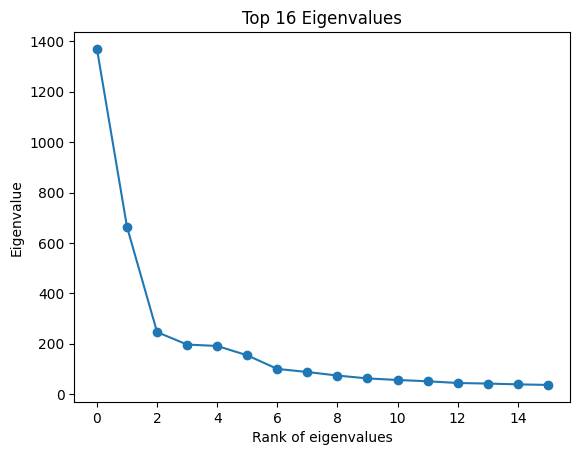

In [8]:
# plot of top 16 eigenvalues
plt.plot(top_eigenvalues, '-o')
plt.title("Top 16 Eigenvalues")
plt.xlabel("Rank of eigenvalues")
plt.ylabel("Eigenvalue")
plt.show()

Now, you will use your eigencats to form a low-dimensional approximation of the data. Each original (scaled) cat image can be approximated by a weighted sum of eigencats, where the weight associated with the $i^{th}$ eigencat corresponds to the projection of the original cat image onto the $i^{th}$ eigencat. Since the eigencats have norm = 1 (you can verify this!), the projection of an image onto each eigencat is simply the inner product between the image and the eigencat.

- Select an image of your choice from the original (scaled) dataset. 
   * Calculate the projection of this image onto the set of all principal components. This will result in a vector of length 4096, whose entries correspond to weights associated with each eigencat.
   * Reconstruct the image from the set of *all* principal components. Display the resulting image.
   * Reconstruct the image using only 1,2,8,16, and 32 principal components. Display all resulting images.
- Repeat the above steps using another randomly selected image.


In [9]:
def PCA(cat_matrix, eigenvectors, index):
    
    # first cat in normalized cat_matrix
    cat = cat_matrix[index]
    
    # display the original image
    vis_cat_image(cat, "Original image")

    # projection on image to the set of all principal components
    projection = np.dot(cat, eigenvectors)
    
    # reconstruct image from set of all principal components
    reconstruct = np.dot(projection, eigenvectors.T)
    
    # display image
    vis_cat_image(reconstruct, "Reconstructed from set of all principal components")
    
    pc = [1, 2, 8, 16, 32]
    for i in range(len(pc)):
        reconstruct_pc = 0
        for j in range(pc[i]):
            reconstruct_pc += np.dot(projection[j], eigenvectors[:, j].T)
        title = "Reconstructed from " + str(pc[i]) + " principal component(s)"
        vis_cat_image(reconstruct_pc, title)

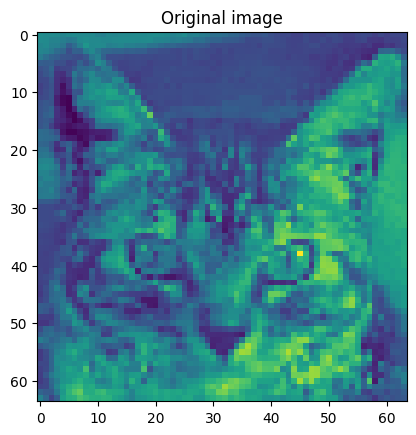

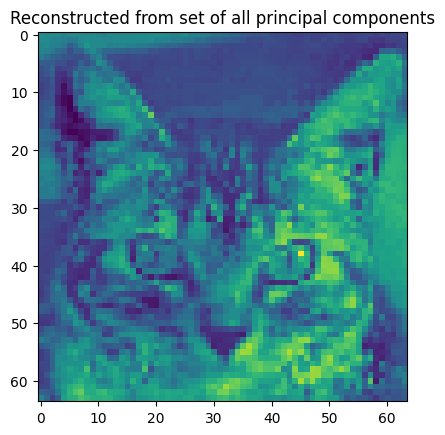

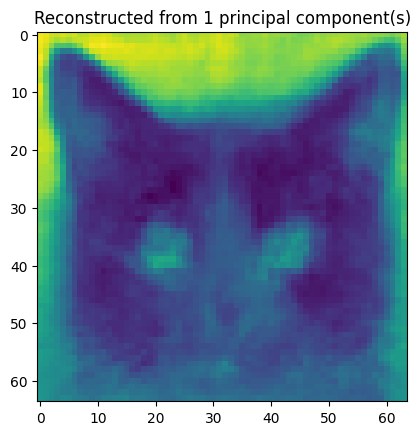

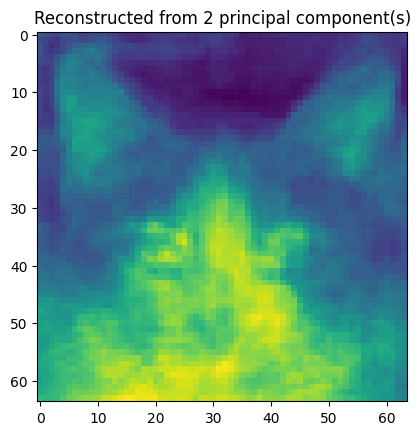

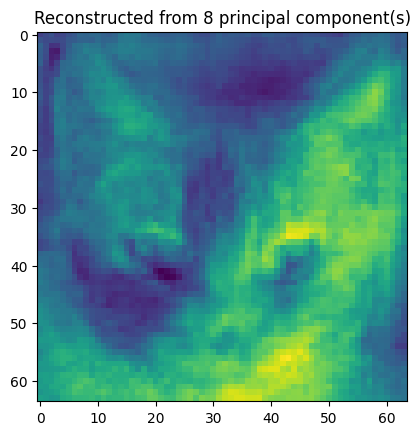

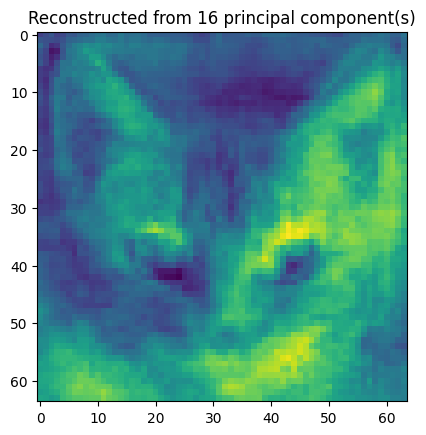

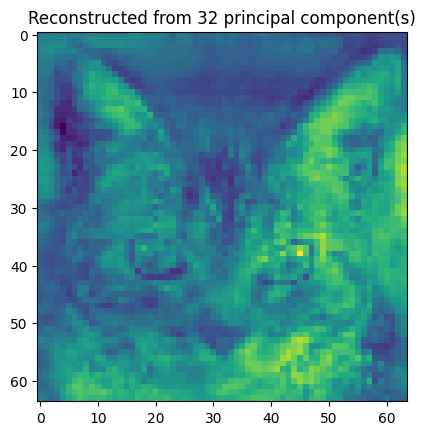

In [10]:
# PCA for first image
PCA(cat_matrix, eigenvectors, 17)

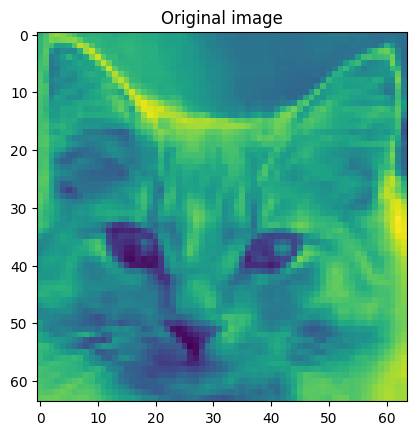

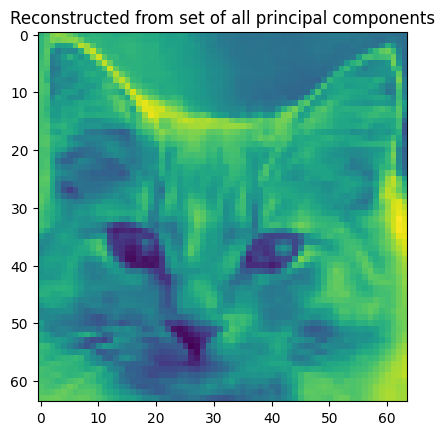

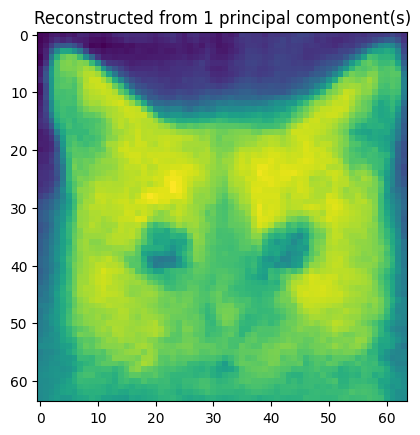

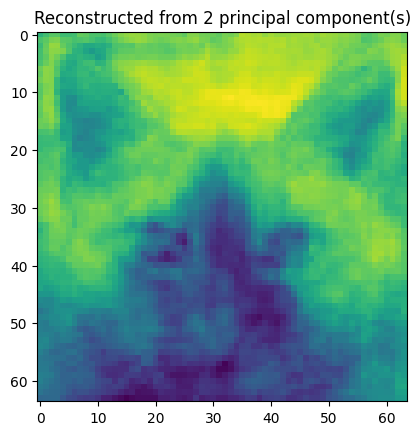

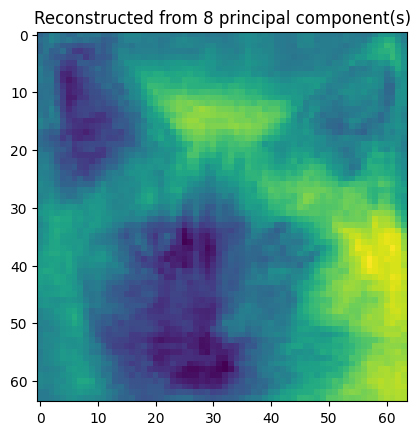

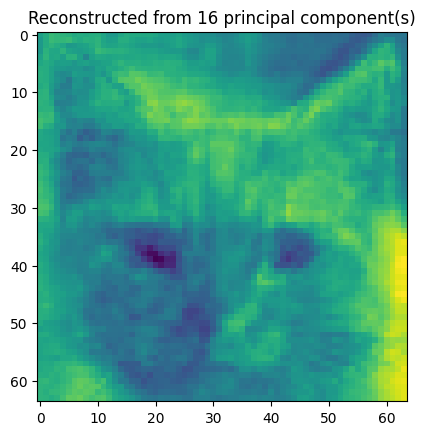

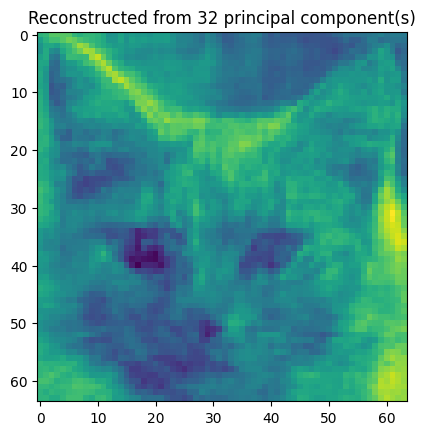

In [11]:
# PCA for second image
PCA(cat_matrix, eigenvectors, 60)

**Question 1** Write down some of your observations about the appearance of the eigencats.

For the top 16 eigenvectors, the eigencats with higher eigenvalues seem to have more image data because they have a higher variance. For example, the eigencat 1 looks the most like a cat face structure. As we move down towards eigencat 16, the cat facial structure is becoming more and more blurred. Thus, higher eigenvalues correspond to eigenvectors that capture more important details from the pixels. Lower eigenvalues correspond to eigenvalues that typically did not resemble a cat as well, thus having a lower variance.

**Question 2** What happens to the reconstructed image as you include more and more principal components? 

As you add more and more principal components, the reconstructed image becomes more and more like the original image. For example, the image reconstructed with all the principal components seems to be identical to the original scaled image. With only one principal component used in the reconstruction, the image typically did not look as similar to the original image. The reconstructed image with 32 principal components looks nearly identical to the image reconstructed from the whole set of principal components.

--- 
## Part 2: Clustering


In this part, we will perform clustering on the cat images using k-means. Since the images are quite high-dimensional (4096 dimensions), we will use PCA to project the data into a lower-dimensional space prior to clustering. 

**Question 3**  Based on your analysis in Part 1, how many principal components are needed to explain 90% of the variance in the data?

From the observations, it seems that 32 principal components are needed to explain 90% of the variance in the data. Variance in PCA is the measurement of the amount of information the data is captured by each principal component. Thus, it seems that the plot of 32 principal components captures most of the data of the pixels from the reconstructed image from the set of all principal components. This can further be proved from the code snipped below as the sum of the eigenvalues from the first 32 principal components divided by the sum of all the eigenvalues is approximately 91%. 

In [12]:
pca32 = eigenvalues[:32]
sum_pca32 = 0
for i  in range(len(pca32)):
    sum_pca32 += pca32[i]

sum_all = 0
for i in range(len(eigenvalues)):
    sum_all += eigenvalues[i]

variance = sum_pca32 / sum_all
print("The variance of 32 principal components is: " + str(variance))

The variance of 32 principal components is: 0.9131802839163037


- Project each cat image onto the set of $L$ eigencats that capture 90% variance in the data. Now, each image is represented by $L$ coordinates (i.e., its projection onto $L$ eigencats) instead of 4096.
- Perform k-means clustering on the resulting vectors, using K=4. You may use functions from scikit-learn.
- This results in 4 cluster centroids. Project those cluster centroids back into the original (4096-dimensional) space, and display each of those 4 centroid cats using the function `viz_cat_image` above.

In [13]:
# set of L eigencats that captures 90% of variance
L = 32

L_projections = np.dot(cat_matrix, eigenvectors[:, :L])

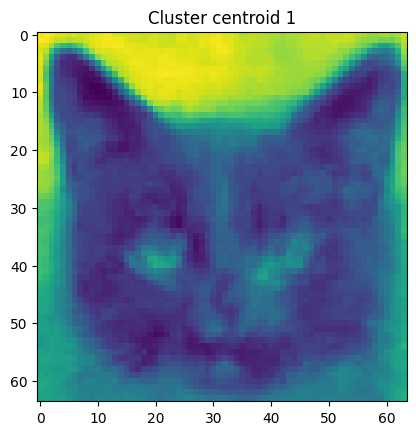

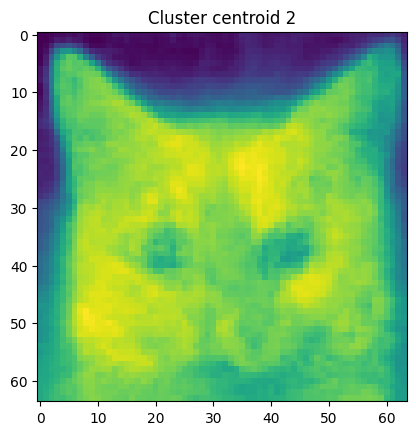

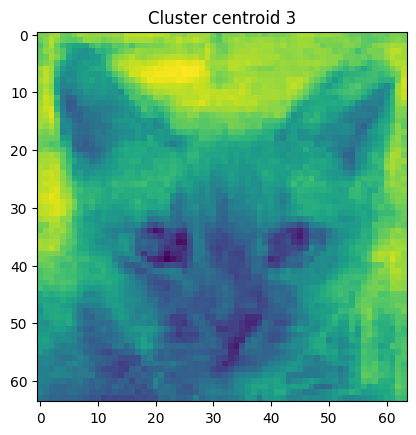

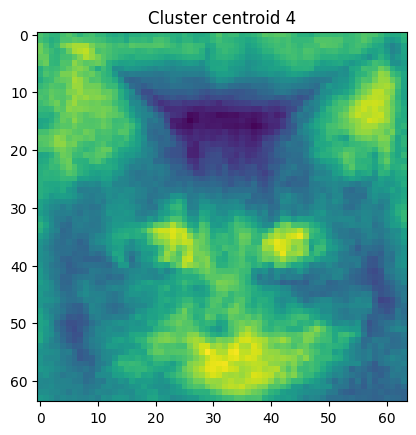

In [14]:
from sklearn.cluster import KMeans

K = 4
kmeans = KMeans(n_clusters = K, n_init = 'auto').fit(L_projections)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

L_eigenvectors = eigenvectors[:, :32]
centroids = np.dot(centroids, L_eigenvectors.T)

for i in range(centroids.shape[0]):
    title = "Cluster centroid " + str(i + 1)
    vis_cat_image(centroids[i], title)

--- 
## Part 3: Deep Learning for Sentiment Analysis

 

In this part, you will be using Keras/PyTorch to build a fully-connected, feed-forward neural network for sentiment analysis. The [dataset](https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification) you will be working with contains 50,000 movie reviews from IMDB and the corresponding labels, where the label indicates whether the review was positive or negative. 

If you are using Keras, make sure you install the tensorflow at first since keras is just a wrapper API package for tensorflow

In [15]:
from keras.datasets import imdb 
from keras.models import Sequential
from keras.layers import Dense

- To begin, run the code block below to load the training and test sets of IMDB data from Keras/PyTorch. Each review (sample) is represented as a sequence of integers, one integer for each word in that review, where the integer assigned to a given word corresponds to the index of that word in the vocabulary. Note that below, we will turn these samples into fixed-length binary vectors. 

In [16]:
# fetch dataset from keras (already has a 50/50 train/test split)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000, seed=113)

# concatenate the data (N = 50,000)
X = np.concatenate((x_train, x_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# transform X such that every input is the same length 
## 1 if input x contains the word, 0 otherwise
## so, we are ignoring word frequency 
X_vec = np.zeros((50000,10000))
for i, x in enumerate(X):
    X_vec[i, x] = 1

# 80/20 train/test split
x_train = X_vec[:40000]
y_train = y[:40000]
x_test = X_vec[40000:]
y_test = y[40000:]

- Using the Keras/PyTorch framework, build a fully-connected, feed-forward neural network for the IMDB dataset. This network should take in the binary vector representations of movie reviews and predict the positive/negative sentiment of the reviews. 
    * Take advantage of Keras’ online documentation. Additional supplemental materials by the TA may be referenced, but should not be used as a template for your homework.
- Hint: use binary cross-entropy as your loss function. 
- **Submit a neural network that reaches >= 85% accuracy on the test set.**

In [17]:
# build model
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(10000,)))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# train on x_train and y_train
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=500,
                    validation_data=(x_test, y_test))

# Eevaluate best on x_test and y_test
results = model.evaluate(x_test, y_test)
print("Final loss: " + str(results[0] * 100) + "%")
print("Final accuracy: " + str(results[1] * 100) + "%")

Epoch 1/30
80/80 [==============================] - 2s 20ms/step - loss: 0.6889 - accuracy: 0.5474 - val_loss: 0.6837 - val_accuracy: 0.5854
Epoch 2/30
80/80 [==============================] - 1s 14ms/step - loss: 0.6747 - accuracy: 0.6290 - val_loss: 0.6636 - val_accuracy: 0.6791
Epoch 3/30
80/80 [==============================] - 1s 14ms/step - loss: 0.6481 - accuracy: 0.7172 - val_loss: 0.6298 - val_accuracy: 0.7500
Epoch 4/30
80/80 [==============================] - 1s 14ms/step - loss: 0.6087 - accuracy: 0.7660 - val_loss: 0.5848 - val_accuracy: 0.7838
Epoch 5/30
80/80 [==============================] - 1s 14ms/step - loss: 0.5620 - accuracy: 0.7929 - val_loss: 0.5365 - val_accuracy: 0.8037
Epoch 6/30
80/80 [==============================] - 1s 14ms/step - loss: 0.5146 - accuracy: 0.8094 - val_loss: 0.4905 - val_accuracy: 0.8198
Epoch 7/30
80/80 [==============================] - 1s 14ms/step - loss: 0.4721 - accuracy: 0.8212 - val_loss: 0.4515 - val_accuracy: 0.8309
Epoch 8/30
80

**Question 4** Specify the optimization method and activation function(s) that you used.

For the optimization method, I used the stochastic gradient descent (SGD) optimizer. I tried several other optimizers (Adam, Adagrad, RMSprop), but I found SGD to lower my losses down the most. With some of the other optimizers, I had losses of up to 80%. Thus, SGD minimized my losses the most. I had three layers in mine. The first two layers utilized the ReLU activation function. The third layer, or the output layer, utilized the sigmoid activation function.

**Question 5** Provide a brief reflection on the process by which you tweaked your network to improve its performance.

After reviewing documentation, I created the fully-connected neural network utilizing a "dense" layer in keras. I decided to create three layers. The first layer has an input of 10,000 so I randomly created 50 neurons. I started with a lot more, but for computation I cut it down to 50 for it to run faster. The same reasoning applied for the second layer, and I ended up cutting the amount of neurons down to to 25. The final layer has 1 neuron since it is the output layer. At first, I made these all "sigmoid", but my accuracy was less than 70%. Same thing happened with all "ReLU" activation functions. Thus, I tweaked it and made the first two layers ReLU and the final layer sigmoid since it is known for binary classification problems. As mentioned in the previous question, I also had to tweak the optimization function and found that SGD minimized the loss the most. I also found that 30 batches and 500 epochs seemed to work well with my data and not take long to compute at all, while still giving good results. Thus, most of my tweaking was trial-and-error, and I finally stopped at my current model when I had the lowest loss and highest accuracy combination that I had seen for my model. 

---
## Part 4: Submission 

Please upload a clean version of your work to Brightspace by the deadline. Below, please acknowledge your collaborators as well as any resources/references (beyond Keras and guides to Python syntax) that you have used in this assignment:

https://stackoverflow.com/questions/8092920/sort-eigenvalues-and-associated-eigenvectors-after-using-numpy-linalg-eig-in-pyt

https://builtin.com/data-science/step-step-explanation-principal-component-analysis

https://ro-che.info/articles/2017-12-11-pca-explained-variance

https://www.kaggle.com/code/residentmario/keras-optimizers

https://towardsdatascience.com/7-popular-activation-functions-you-should-know-in-deep-learning-and-how-to-use-them-with-keras-and-27b4d838dfe6